# Banking Sector Indicators

**1. Effective Interest Rates**

Definition:

    The effective interest rate refers to the actual interest rate that borrowers or savers experience after accounting for the compounding of interest during a specific period. It is typically higher than the nominal (or stated) interest rate due to this compounding effect.

Explanation:

    The effective interest rate shows the real cost of borrowing or the real return on investment over a period.
    It’s useful for comparing loans or investments with different compounding frequencies (e.g., monthly, quarterly, annually).
    In banking, this helps consumers understand the actual cost or yield of loans, mortgages, savings accounts, and other financial products.
    
**2. International Reserves**

Definition:

    International reserves are assets held by a country’s central bank or monetary authority to back its liabilities and support the stability of its currency. These reserves consist of various assets, which provide a buffer against external shocks, while central bank liabilities mainly represent obligations such as domestic currency issued.

Assets in International Reserves:

- Foreign currencies: These are foreign exchange assets like USD, EUR, GBP, etc., held by the central bank.
- Gold reserves: Gold is a traditional reserve asset with intrinsic value and is held as part of international reserves.
- Special Drawing Rights (SDRs): These are international reserve assets created by the International Monetary Fund (IMF) to supplement member countries' official reserves.
- IMF reserve positions: This refers to the country's reserve tranche position in the IMF, which represents a portion of the country’s financial contribution to the IMF that can be withdrawn if needed.

Liabilities of the Central Bank (that affect reserves):

- Domestic currency issued: This refers to the amount of currency in circulation, which represents a liability for the central bank.
- Deposits from commercial banks: Central banks hold reserves on behalf of domestic banks, and these deposits are a liability to the central bank.
- Government accounts: These are liabilities related to the funds held by the central bank on behalf of the government.

Explanation:

    Central banks manage the balance between assets (such as foreign exchange and gold) and liabilities (like domestic currency and bank deposits) to ensure financial stability.
    The level of reserves is critical for maintaining confidence in the country’s ability to meet its foreign obligations and manage its currency.
    Adequate international reserves can be used to defend the currency during financial crises or to smooth out exchange rate volatility.


**3. Money and Credit (M4)**

Definition:

    Money Supply (M4) represents the broadest measure of money in circulation within an economy, which includes not just currency and demand deposits but also broader financial assets such as certificates of deposit and money market accounts. Credit refers to the loans and advances provided by banks and financial institutions to households, businesses, and governments.

Components of M4:

- M0: Physical currency and coins in circulation.
- M1: M0 + demand deposits (checking accounts).
- M2: M1 + savings accounts, time deposits, and certain money market securities.
- M3: M2 + large time deposits, institutional money market funds, and short-term repurchase agreements.
- M4: M3 + other liquid assets (e.g., certificates of deposit, Treasury bills, and highly liquid securities not included in M3).

Explanation:

    M4 is the most comprehensive measure of money supply, capturing both highly liquid forms of money and other near-money assets that can be easily converted into cash.
    Central banks monitor M4 as it can provide a broad picture of liquidity in the economy. A rapid increase in M4 can signal inflationary pressures, while slow growth may indicate economic stagnation.
    Credit growth is an important factor in understanding how much lending is occurring in the economy. High levels of credit availability can stimulate consumption and investment, boosting economic growth.


## Load Data

In [1]:
import pandas as pd

# Load the Excel file to see the sheet names and the structure of the data
file_path = './data/Banking sector.xlsx'
excel_file = pd.ExcelFile(file_path)

# Display the sheet names to understand what tables are available
sheet_names = excel_file.sheet_names
sheet_names

['Effective interest rates', 'Money and credit', 'Reserve assets']

In [2]:
# Load data from the relevant sheets
money_credit_df = excel_file.parse('Money and credit')
loan_interest_df = excel_file.parse('Effective interest rates')
reserve_assets_df = excel_file.parse('Reserve assets')

In [3]:
money_credit_df['Date'] = pd.to_datetime(money_credit_df['Date'], format='mixed')
money_credit_df_reversed = money_credit_df.iloc[::-1].reset_index(drop=True)
money_credit_df = money_credit_df_reversed
money_credit_df.head()

,Date,Money,Lending
0,2010-06-30,1.1,-0.8
1,2010-07-31,1.0,-0.4
2,2010-08-31,1.2,-0.1
3,2010-09-30,1.8,-0.7
4,2010-10-31,1.7,-0.4


In [4]:
loan_interest_df['Date'] = pd.to_datetime(loan_interest_df['Date'], format='mixed')
loan_interest_df_reversed = loan_interest_df.iloc[::-1].reset_index(drop=True)
loan_interest_df = loan_interest_df_reversed
loan_interest_df.head()

,Date,Loan interests average percentage,Deposit interest average percentage
0,2016-01-31,7.17,1.35
1,2016-02-29,7.22,1.30
2,2016-03-31,6.85,1.24
3,2016-04-30,7.06,1.21
4,2016-05-31,7.20,1.21


In [5]:
# Format the Reserve assets table
df_cleaned = reserve_assets_df.drop([0, 3])
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned = df_cleaned.T
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned.drop(df_cleaned.index[0])
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.rename(columns={'index': 'Date'})
df_cleaned.columns = ['Date', 'UK Total Reserve Assets', 'UK Total Liabilities',
                      'BoE Total Reserve Assets', 'BoE Total Liabilities']

df_cleaned['UK Total Reserve Assets'] = pd.to_numeric(df_cleaned['UK Total Reserve Assets'], errors='coerce')
df_cleaned['UK Total Liabilities'] = pd.to_numeric(df_cleaned['UK Total Liabilities'], errors='coerce')
df_cleaned['BoE Total Reserve Assets'] = pd.to_numeric(df_cleaned['BoE Total Reserve Assets'], errors='coerce')
df_cleaned['BoE Total Liabilities'] = pd.to_numeric(df_cleaned['BoE Total Liabilities'], errors='coerce')

reserve_assets_df = df_cleaned
reserve_assets_df.head()

,Date,UK Total Reserve Assets,UK Total Liabilities,BoE Total Reserve Assets,BoE Total Liabilities
0,2016-04-01,144976.461183,-105839.990417,28091.865073,-28094.809949
1,2016-05-01,139957.479208,-101989.295739,26560.905700,-26562.484588
2,2016-06-01,143466.667056,-103879.425973,25124.975462,-25126.697380
3,2016-07-01,149048.328675,-109241.761323,25174.344735,-25174.698055
4,2016-08-01,147319.656304,-107976.017120,25892.620101,-25894.820527


In [21]:
# Save each DataFrame to CSV
money_credit_df.to_csv('./data/money_credit.csv', index=False)
loan_interest_df.to_csv('./data/loan_interest.csv', index=False)
reserve_assets_df.to_csv('./data/reserve_assets.csv', index=False)

## Descriptive Statistics

In [6]:
reserve_assets_df_stats = reserve_assets_df.drop(columns=['Date']).describe()
reserve_assets_df_stats


,UK Total Reserve Assets,UK Total Liabilities,BoE Total Reserve Assets,BoE Total Liabilities
count,102.000000,102.000000,102.000000,102.000000
mean,173965.332383,-104359.361625,25476.355640,-25476.531932
std,16395.295833,8512.891687,4430.796598,4427.739066
min,136586.033561,-125053.188211,17872.633362,-36442.724891
25%,162766.587967,-110654.229104,22030.201206,-28078.858055
50%,177908.511247,-104365.183733,24648.062322,-24623.072596
75%,184492.806162,-99268.417245,28078.584634,-22027.534285
max,203709.230133,-85785.335739,36449.947029,-17877.580398


**Uk Reserves:**

Financial Imbalance:

    The average total liabilities are approximately -104,359.36 million, which is significantly less than the average total reserve assets of 173,965.33 million. This suggests that the UK has a healthy level of reserve assets compared to its liabilities.

Fluctuations in Assets:

    The high standard deviation of $16,395.30 million in total reserve assets indicates significant fluctuations over time. It may be beneficial to investigate the factors contributing to this variability.

Potential Risks:

    Total liabilities range from a minimum of -125,053.19 million to a maximum of -85,785.34 million, indicating substantial and varying liabilities. This could lead to liquidity issues, especially during economic downturns.

**Bank of England Reserves:**

Balanced Financial Position:

    The BoE’s total reserve assets average 25,476.36 million, which is approximately equal to its total liabilities of -25,476.53 million. This indicates a balanced financial strategy, but the negative mean suggests a concerning deficit.

Stability in Reserves:

    The standard deviation for total reserve assets is 4,430.80 million, and for total liabilities, it is 4,427.74 million, indicating that both figures are relatively stable over time. This reflects effective management of the BoE’s reserves.

Potential Vulnerability:

    Although the Bank maintains a balanced position, the close relationship between assets and liabilities, combined with liabilities slightly exceeding assets, can pose risks during financial strain.

In [7]:
loan_interest_df_stats = loan_interest_df.describe()
loan_interest_df_stats

,Date,Loan interests average percentage,Deposit interest average percentage
count,104,104.000000,104.000000
mean,2020-05-15 15:41:32.307692288,7.024423,1.594808
min,2016-01-31 00:00:00,4.420000,0.230000
25%,2018-03-23 06:00:00,6.430000,0.747500
50%,2020-05-15 12:00:00,7.040000,0.950000
75%,2022-07-07 18:00:00,7.480000,1.507500
max,2024-08-31 00:00:00,9.270000,5.230000
std,NaN,1.118980,1.490253


Loan Interest Rates:

    The average loan interest rate is approximately 7.02% with a standard deviation of 1.12%. This indicates a moderate level of variability in the loan interest rates, suggesting that while most loan interest rates cluster around the mean, there are some instances of significantly higher or lower rates.

Range of Loan Interest Rates:

    The loan interest rates range from a minimum of 4.42% to a maximum of 9.27%. This range highlights that there are options available for borrowers, but it also indicates potential variability in costs depending on the lending institution or market conditions.

Deposit Interest Rates:

    The average deposit interest rate is approximately 1.59% with a higher standard deviation of 1.49% compared to the loan interest rates. This indicates that deposit interest rates have a wider spread, with some outliers significantly higher than the average.

Range of Deposit Interest Rates:

    The deposit interest rates range from a minimum of 0.23% to a maximum of 5.23%. The low minimum value suggests that many depositors may receive very low returns on their deposits, potentially impacting savings behavior.

Comparative Analysis:

    The average loan interest rate (7.02%) is substantially higher than the average deposit interest rate (1.59%). This spread indicates a potential margin for banks and lending institutions but may also suggest a significant cost of borrowing for consumers compared to the returns on their savings.

In [8]:
money_credit_df_stats = money_credit_df.describe()
money_credit_df_stats

,Date,Money,Lending
count,171,171.000000,171.000000
mean,2017-07-30 23:17:53.684210432,4.377778,2.235088
min,2010-06-30 00:00:00,-4.200000,-2.700000
25%,2014-01-15 12:00:00,2.500000,0.350000
50%,2017-07-31 00:00:00,4.100000,2.200000
75%,2021-02-14 00:00:00,5.150000,3.900000
max,2024-08-31 00:00:00,15.400000,6.800000
std,NaN,3.215455,2.195784


    
    Money = the amount of broad money (M4 liabilities) in percents banks owe to the private sector.

    Lending = the amount of loans in percents banks have extended to the private sector.

Broad Money (M4 Liabilities):

    The average percentage of broad money owed by banks to the private sector is approximately 4.38%. This indicates a moderate level of broad money supply in relation to the liabilities that banks have towards private sector entities.

Variability in Money Supply:

    The standard deviation of 3.22% suggests significant variability in the amounts of broad money across different observations. This variability could indicate fluctuations in the money supply due to changes in economic conditions, monetary policy, or other external factors.

Range of Broad Money:

    The broad money percentage ranges from a minimum of -4.20% to a maximum of 15.40%. The negative value indicates that in some instances, banks may have experienced net withdrawals of M4 liabilities, which could raise concerns about liquidity in certain periods.

Loans Extended to the Private Sector:

    The average percentage of loans extended by banks to the private sector is approximately 2.24%. This figure, while lower than the average for broad money, still suggests a moderate level of lending activity relative to the banks' total liabilities to the private sector.

Variability in Lending:

    The standard deviation of 2.20% indicates that there is a notable spread in the loan percentages extended to the private sector. This could be influenced by factors such as risk assessment by banks, economic conditions, and demand for loans.

Range of Lending Percentages:

    Lending percentages range from a minimum of -2.70% to a maximum of 6.80%. Similar to broad money, the negative lending percentage raises flags about periods where banks may have retracted lending or faced losses, possibly reflecting economic downturns or tightening credit conditions.

Comparative Analysis:

    The average percentage of broad money (4.38%) is significantly higher than that of loans extended (2.24%). This disparity indicates that while banks owe a considerable amount of money to the private sector, they may not be lending as much relative to their liabilities. This could imply a cautious lending environment or a preference for liquidity.



## Visualizations


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Money and credit

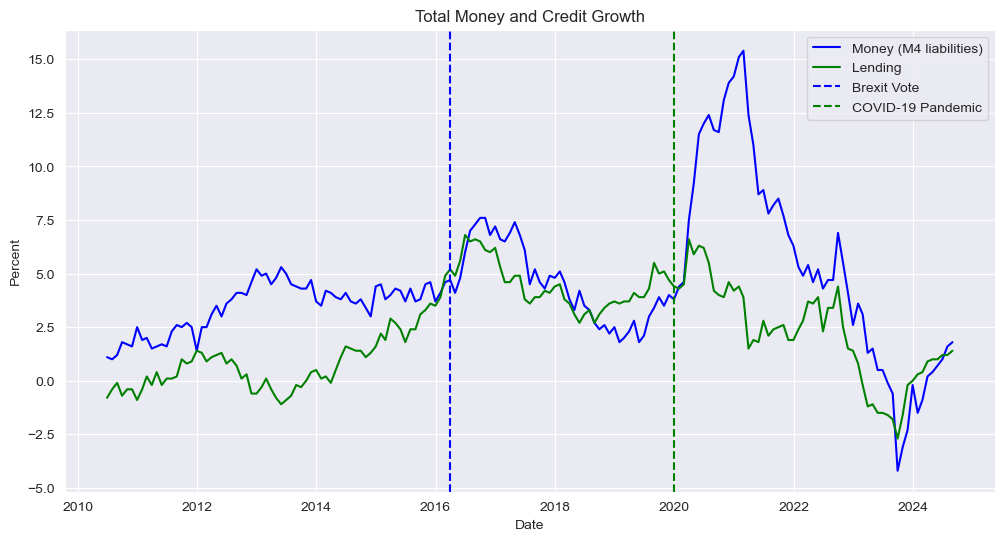

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(money_credit_df['Date'], money_credit_df['Money'], label='Money (M4 liabilities)', color='b')
plt.plot(money_credit_df['Date'], money_credit_df['Lending'], label='Lending', color='g')
plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')
plt.title('Total Money and Credit Growth')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend()
plt.show()

General Trends:

    Money (M4 liabilities) appears to fluctuate more significantly compared to Lending, indicating that monetary conditions (bank liabilities to the private sector) are more volatile.
    
    Lending shows a generally smoother pattern, suggesting that banks’ lending practices respond more gradually to economic changes compared to monetary conditions.
    
Impact of Brexit Vote (2016 Q2):

    The plot shows a relatively stable trend leading up to the Brexit vote in 2016.
    
    After 2016, there is some variability in both "Money" and "Lending" growth, but no sharp immediate deviation is noticeable. It suggests that the economic uncertainties introduced by Brexit may have affected these indicators, but the impact on credit growth was gradual rather than abrupt.

Impact of COVID-19 Pandemic (2020 Q1):

    The COVID-19 pandemic marked a significant shift in both series.
    
    Money (M4 liabilities) shows a sharp increase in early 2020, possibly due to central bank interventions, stimulus packages, and changes in monetary policies aimed at combating the economic fallout from the pandemic.
    
    Lending initially shows a dip, likely reflecting the economic shock and risk aversion among lenders, followed by a rise as economic policies and relief efforts took effect.

Post-COVID Recovery and Subsequent Trends:

    After the sharp rise during the pandemic, Money (M4 liabilities) growth begins to decline, reflecting a normalization or tightening of monetary conditions.
    
    Lending also shows a decline after an initial post-pandemic rise, possibly due to economic uncertainties, tightening of credit conditions, or shifts in bank policies.
    
    The period from 2022 onwards indicates some volatility, with growth rates for both indicators showing signs of recovery towards 2024, though not reaching the pre-pandemic highs.

### Correlation

In [11]:
correlation = money_credit_df[['Money', 'Lending']].corr()
correlation

,Money,Lending
Money,1.000000,0.557175
Lending,0.557175,1.000000


    A correlation of 0.557 is not close to 1, indicating that while there is a relationship, it is not very strong. The factors influencing "Lending" growth are not solely determined by "Money" growth. Other variables, such as interest rates, economic policies, credit demand, and risk conditions, also play a role.

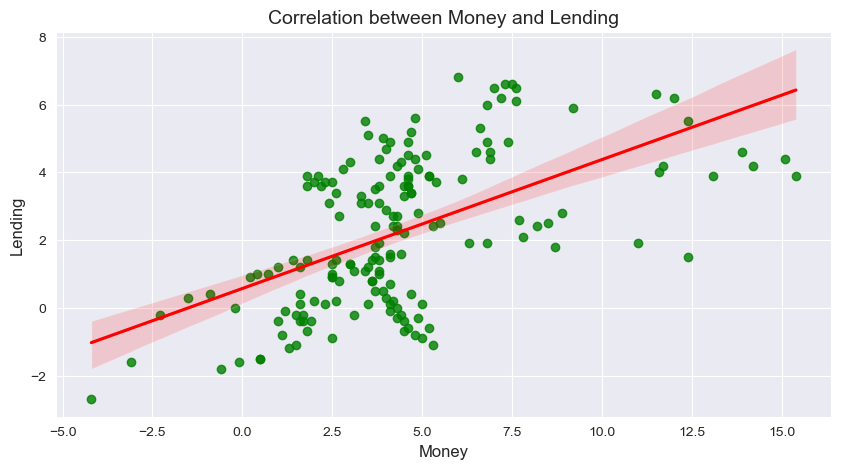

In [12]:
plt.figure(figsize=(10, 5))
sns.regplot(x=money_credit_df['Money'], y=money_credit_df['Lending'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between Money and Lending', fontsize=14)
plt.xlabel('Money', fontsize=12)
plt.ylabel('Lending', fontsize=12)
plt.grid(True)
plt.show()

### Conclusion

significant economic events, such as the COVID-19 pandemic, have a pronounced impact on monetary conditions, while lending tends to be less volatile but still influenced by broader economic policies and uncertainties.

There is a lag in the response of Lending to economic shocks compared to Money, which may reflect the time it takes for lending practices and credit growth to adjust to new economic realities.

The moderate positive correlation suggests that changes in broad money supply could have some influence on lending practices. For instance, when monetary policy leads to an increase in the money supply, it may create favorable conditions for banks to extend more credit.

However, the correlation is not strong enough to imply a direct causality, meaning other factors likely influence the lending practices as well.

### Effective Interest Rates

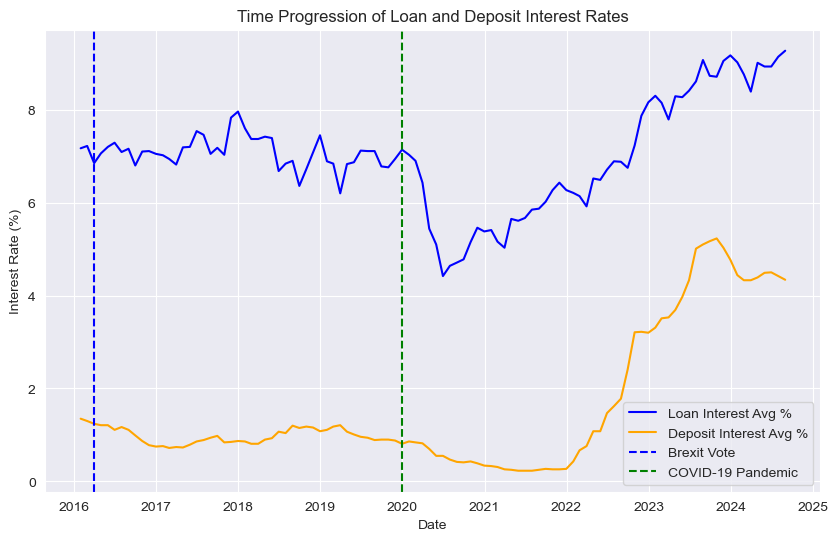

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(loan_interest_df['Date'], loan_interest_df['Loan interests average percentage'], label='Loan Interest Avg %',
         color='blue')
plt.plot(loan_interest_df['Date'], loan_interest_df['Deposit interest average percentage'],
         label='Deposit Interest Avg %', color='orange')
plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')
# Adding labels and title
plt.title('Time Progression of Loan and Deposit Interest Rates')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

Loan Interest Rates (Blue Line):

    Loan interest rates were relatively stable from 2016 to 2020, with minor fluctuations, staying in the range of 6–7%.
    
    After the start of the COVID-19 pandemic in early 2020, loan interest rates dropped significantly, reaching a low around mid-2020. This likely reflects economic uncertainty and central bank actions to lower rates to stimulate borrowing and support the economy.
    
    From 2021 onwards, loan interest rates began rising sharply, peaking in 2024 at over 8%. This increase likely reflects rising inflation, economic recovery from the pandemic, and central banks raising rates to curb inflationary pressures.

Deposit Interest Rates (Orange Line):

    Deposit interest rates were low and relatively flat between 2016 and 2020, remaining under 1%. This indicates a period of low returns on deposits, which is consistent with the broader low-interest-rate environment in the years following the 2008 financial crisis.
    
    In 2021, deposit rates started to rise rapidly, peaking in late 2022 and 2023. This increase likely correlates with inflationary pressures and central bank efforts to combat inflation by raising interest rates. This would make saving more attractive as deposit rates increase.
    
    After peaking, deposit rates started to decline slightly but remain higher than pre-pandemic levels.

### Correlation

In [14]:
correlation = loan_interest_df[['Loan interests average percentage', 'Deposit interest average percentage']].corr()
correlation

,Loan interests average percentage,Deposit interest average percentage
Loan interests average percentage,1.000000,0.823945
Deposit interest average percentage,0.823945,1.000000


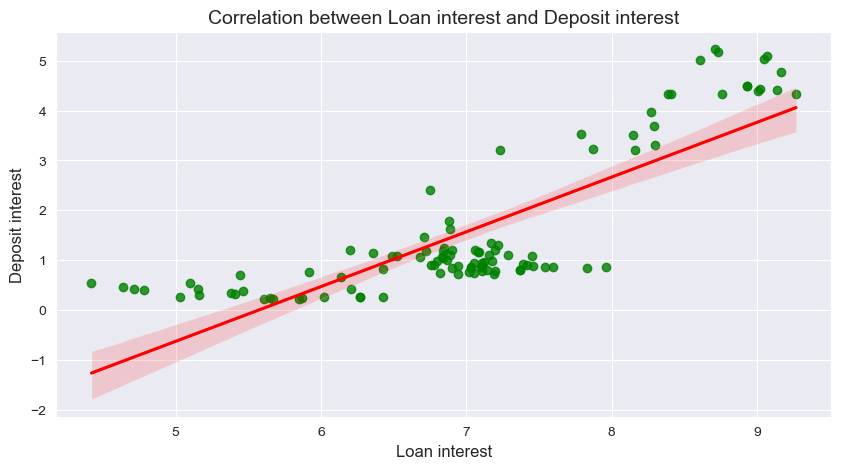

In [15]:
plt.figure(figsize=(10, 5))
sns.regplot(x=loan_interest_df['Loan interests average percentage'],
            y=loan_interest_df['Deposit interest average percentage'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between Loan interest and Deposit interest', fontsize=14)
plt.xlabel('Loan interest', fontsize=12)
plt.ylabel('Deposit interest', fontsize=12)
plt.grid(True)
plt.show()

    A correlation coefficient of 0.82 indicates a strong positive correlation between the loan interest rates and deposit interest rates.

    This means that when loan interest rates increase, deposit interest rates tend to increase as well, and vice versa. 
    The two rates generally move in the same direction.

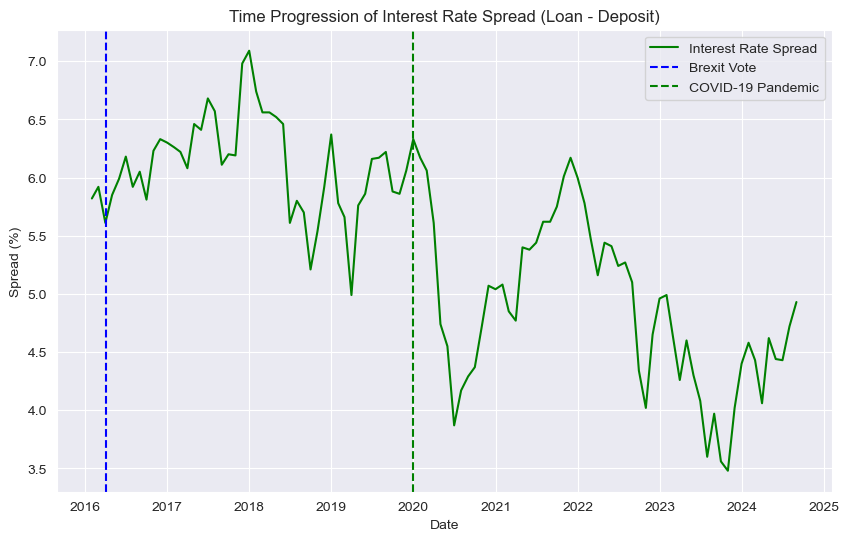

In [16]:
loan_interest_df['Spread'] = loan_interest_df['Loan interests average percentage'] - loan_interest_df[
    'Deposit interest average percentage']

plt.figure(figsize=(10, 6))
plt.plot(loan_interest_df['Date'], loan_interest_df['Spread'], label='Interest Rate Spread', color='green')
plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')
plt.title('Time Progression of Interest Rate Spread (Loan - Deposit)')
plt.xlabel('Date')
plt.ylabel('Spread (%)')
plt.grid(True)
plt.legend()
plt.show()

Higher Spread:

    A larger spread indicates that banks or lending institutions are charging significantly higher interest rates on loans compared to the interest they are paying on deposits.
    
    This tends to improve the profitability of lending institutions but may make borrowing more expensive for consumers and businesses. For example, the spread is wider in 2018, indicating a more favorable condition for banks in terms of profitability.
    
Lower Spread:

    A narrower spread, such as what is observed in late 2020 to early 2021, suggests that the difference between loan and deposit rates has reduced.
    This could imply tighter economic conditions or that borrowing has become more affordable relative to deposit rates. However, it might also indicate reduced profitability for banks.

Sharp Declines:

    Notable drops in the spread, such as the one around 2020, could indicate periods of economic instability or response to external shocks, such as the COVID-19 pandemic.
    
    During this time, central banks might have intervened to lower interest rates in an attempt to stimulate borrowing and support the economy. Deposit rates, however, might have already been at very low levels, resulting in the sharp reduction of the spread.

Recovery or Expansion in Spread:

    A rise in the spread in late 2021 suggests a return to conditions where lending becomes more profitable again for banks. It could also indicate that borrowing costs for consumers and businesses are rising, which might have implications for economic growth and financial risk.

### Conclusion

Rising Loan Rates: A higher cost of borrowing can reduce consumer spending and business investments, potentially leading to slower economic growth. From a risk perspective, borrowers face higher financial strain as loan costs increase.

Rising Deposit Rates: Higher deposit rates are generally favorable for savers, incentivizing saving rather than spending. However, this could reduce liquidity in the market and slow down economic activity.

High Correlation: Banks often adjust both loan and deposit rates in response to changes in market conditions. For example, if central banks raise interest rates, banks will increase both the rates they charge for loans (to cover their own costs) and the rates they offer for deposits (to attract more savings).

Widening Spread: The increasing gap between loan and deposit rates indicates growing profitability for banks but also signals higher risks for borrowers, which could increase default rates, especially in a high-inflation environment.

## Reserve Assets

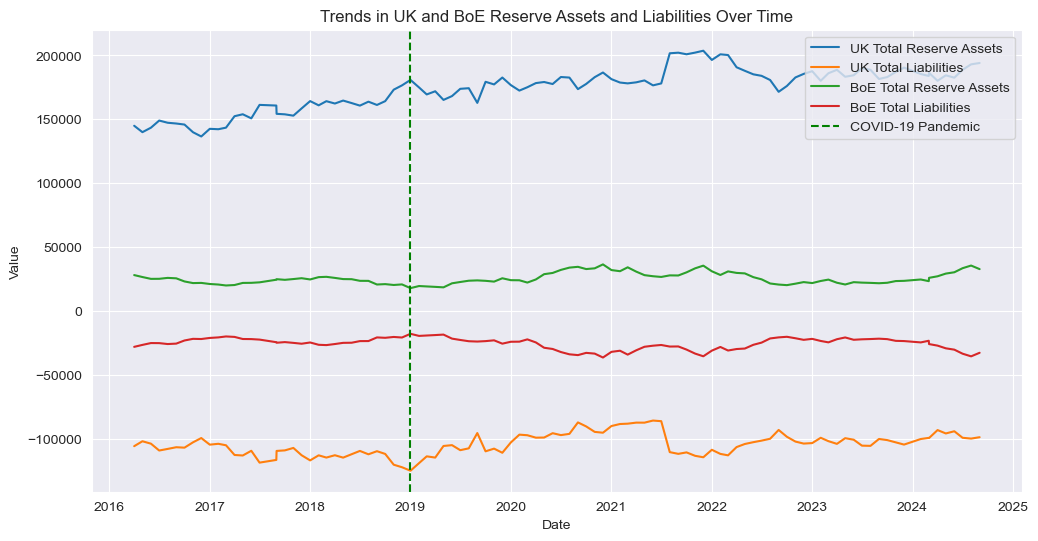

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(reserve_assets_df['Date'], reserve_assets_df['UK Total Reserve Assets'], label='UK Total Reserve Assets')
plt.plot(reserve_assets_df['Date'], reserve_assets_df['UK Total Liabilities'], label='UK Total Liabilities')
plt.plot(reserve_assets_df['Date'], reserve_assets_df['BoE Total Reserve Assets'], label='BoE Total Reserve Assets')
plt.plot(reserve_assets_df['Date'], reserve_assets_df['BoE Total Liabilities'], label='BoE Total Liabilities')
plt.axvline(x=pd.Timestamp('2019-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends in UK and BoE Reserve Assets and Liabilities Over Time')
plt.legend()
plt.show()

* UK Total Reserve Assets (Blue Line):

    The UK’s reserve assets show a relatively stable upward trend from 2016 through to 2024. There is a noticeable increase between 2020 and 2022, possibly in response to global economic conditions, including the COVID-19 pandemic.
    A peak is observed in early 2022, followed by a slight decline, which could correspond to economic adjustments post-pandemic and market volatility in response to global events such as inflation, energy crises, or geopolitical instability.

* UK Total Liabilities (Orange Line):

    UK total liabilities fluctuate more compared to reserve assets but remain negative throughout, representing debts or obligations. From 2016 to 2024, there is a downward trend, indicating that liabilities are becoming more negative (i.e., increasing).
    However, there is a slight dip followed by a correction during the 2020–2021 period, which may be linked to financial interventions or adjustments during the pandemic. Despite some fluctuations, liabilities trend toward a more stable pattern toward the end of 2024.

* BoE Total Reserve Assets (Green Line):

    The BoE’s reserve assets remain relatively stable across the period, fluctuating slightly but maintaining a flat trajectory. This suggests that while reserve levels are maintained, they do not fluctuate significantly compared to the overall UK's reserve assets.
    The stable trend implies the BoE has maintained a consistent reserve policy during this time, without the same level of increases seen in the broader UK total reserve assets.

* BoE Total Liabilities (Red Line):

    The BoE’s liabilities, like the UK's liabilities, are negative, indicating debts or obligations. However, they also remain stable over time, with only small fluctuations.
    This suggests the BoE has not seen the same levels of increased liabilities as the UK overall, possibly reflecting its role as a central bank with different fiscal responsibilities.

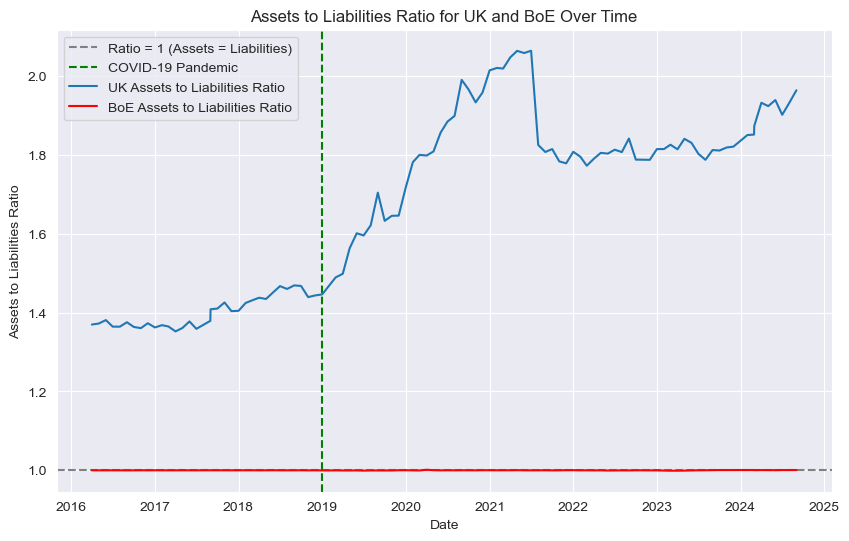

In [18]:
# Calculate ratio of assets to liabilities for UK and BoE
reserve_assets_df['UK Assets to Liabilities Ratio'] = reserve_assets_df['UK Total Reserve Assets'] / reserve_assets_df[
    'UK Total Liabilities'].abs()
reserve_assets_df['BoE Assets to Liabilities Ratio'] = reserve_assets_df['BoE Total Reserve Assets'] / \
                                                       reserve_assets_df['BoE Total Liabilities'].abs()

# Plot the ratios over time
plt.figure(figsize=(10, 6))
plt.axhline(y=1, color='gray', linestyle='--', label='Ratio = 1 (Assets = Liabilities)')
plt.axvline(x=pd.Timestamp('2019-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')

plt.plot(reserve_assets_df['Date'], reserve_assets_df['UK Assets to Liabilities Ratio'],
         label='UK Assets to Liabilities Ratio')
plt.plot(reserve_assets_df['Date'], reserve_assets_df['BoE Assets to Liabilities Ratio'],
         label='BoE Assets to Liabilities Ratio', color='red')
plt.xlabel('Date')
plt.ylabel('Assets to Liabilities Ratio')
plt.title('Assets to Liabilities Ratio for UK and BoE Over Time')
plt.legend()
plt.show()


UK Assets to Liabilities Ratio (Blue Line):

    The ratio gradually increased from 2016 until late 2019, remaining relatively stable around 1.4 to 1.5. This indicates that UK assets were consistently about 40-50% higher than liabilities during this period.
    
    The ratio saw a significant jump starting around early 2020, coinciding with the onset of the COVID-19 pandemic (marked by the vertical green dashed line). The pandemic likely led to changes in the financial system, such as increased asset purchases or liquidity measures, causing a rapid rise in the ratio.
    
    By 2021, the ratio reached levels above 2.0, meaning that UK assets were more than twice the liabilities. This increase may reflect economic interventions or changes in asset valuations due to the pandemic.
    
    Following the peak, there was some volatility in the ratio, with fluctuations between 1.8 and 2.1, suggesting adjustments in assets or liabilities, possibly due to post-pandemic economic recovery and changing market conditions.

BoE Assets to Liabilities Ratio (Red Line):

    The ratio for the BoE remains consistently close to 1.0, indicating that the BoE's assets closely matched its liabilities throughout the observed period.
    
    The horizontal nature of the line suggests that the BoE maintained a balanced approach to managing its balance sheet, with assets nearly equal to liabilities, reflecting a stable financial policy stance.

Significance of the COVID-19 Pandemic (Green Vertical Line):

    The marked increase in the UK’s assets to liabilities ratio around the beginning of 2020 suggests a strong response to the pandemic, possibly through monetary policies such as asset purchases, credit programs, or other financial interventions to support the economy.

### Correlation

In [19]:
# Correlation between assets and liabilities
correlation_matrix = reserve_assets_df[['UK Total Reserve Assets', 'UK Total Liabilities',
                                        'BoE Total Reserve Assets', 'BoE Total Liabilities']].corr()

# Display correlation matrix
correlation_matrix

,UK Total Reserve Assets,UK Total Liabilities,BoE Total Reserve Assets,BoE Total Liabilities
UK Total Reserve Assets,1.000000,0.158132,0.414342,-0.414337
UK Total Liabilities,0.158132,1.000000,0.410747,-0.410643
BoE Total Reserve Assets,0.414342,0.410747,1.000000,-0.999998
BoE Total Liabilities,-0.414337,-0.410643,-0.999998,1.000000


* UK Total Reserve Assets and UK Total Liabilities (0.158132):

    The correlation is 0.158, indicating a weak positive relationship between UK reserve assets and total liabilities. This suggests that, as reserve assets increase, liabilities may also slightly increase, but the relationship is not very strong.

* UK Total Reserve Assets and BoE Total Reserve Assets (0.414342):

    The correlation of 0.414 indicates a moderate positive relationship between UK and BoE reserve assets. This suggests that changes in the UK's total reserve assets are somewhat associated with changes in the BoE's reserve assets, possibly reflecting coordinated financial policies or shared economic conditions.

* UK Total Reserve Assets and BoE Total Liabilities (-0.414337):

    The correlation is -0.414, indicating a moderate negative relationship. As the UK's reserve assets increase, the BoE's liabilities tend to decrease, and vice versa. This may reflect different financial strategies employed by the UK and the BoE.

* UK Total Liabilities and BoE Total Reserve Assets (0.410747):

    The correlation of 0.411 shows a moderate positive relationship, suggesting that when the UK's total liabilities increase, BoE reserve assets also tend to increase. This could imply that the BoE might increase its reserve assets to balance or support the financial system when liabilities rise.

* UK Total Liabilities and BoE Total Liabilities (-0.410643):

    The correlation of -0.411 indicates a moderate negative relationship. When UK total liabilities increase, BoE liabilities tend to decrease. This suggests a possible balancing approach where, as UK liabilities grow, the BoE reduces its liabilities.

* BoE Total Reserve Assets and BoE Total Liabilities (-0.999998):

    There is an almost perfect negative correlation between BoE total reserve assets and BoE total liabilities. This indicates that when one increases, the other almost exactly decreases. This could reflect a strategy by the BoE to keep a balanced balance sheet by adjusting its reserve assets and liabilities in opposite directions.

### Conclusion

There is clear divergence in the behavior of the UK's overall financial system and the BoE's balance sheet. While the UK’s assets to liabilities ratio saw substantial growth, particularly during and after the onset of the COVID-19 pandemic, the BoE maintained a relatively stable balance. This suggests that broader financial sector changes, including private and public sector activities, significantly influenced the overall UK ratio, while the BoE's operations remained more balanced and controlled

There are moderate correlations between the UK's and BoE's financial metrics, suggesting some level of interdependence, possibly due to shared economic policies or external factors.

The near-perfect negative correlation between BoE reserve assets and liabilities suggests a strong balancing mechanism in the BoE's financial strategy, maintaining stability in its balance sheet.

The weak correlation between UK reserve assets and liabilities suggests that changes in reserves do not strongly predict changes in liabilities, indicating other factors may influence liabilities in the UK.